In [1]:
import numpy as np
import scipy as sp
import sympy as sy
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
%matplotlib inline
sy.init_printing()

## Sympy

### Problem 1. 
Write a function `myexp` that takes an integer `n` as a parameter and evaluates `e` to the `nth` digit, using an approach similar to the code given above. Use the series 

$$ e = \sum^{\infty}_{n=0}{\frac{1}{n !}}$$

Use the same condition as above to determine when to break your while loop.

In [2]:
def myexp(n):
    tot = sy.Rational(0, 1)
    term = 1
    bound = sy.Rational(1,10)**(n+1)
    i = 0
    while bound <= term:
        term = sy.Rational(1, sy.factorial(i))
        tot+=term
        i+=1
    return sy.Float(tot, n)

In [3]:
myexp(3)

In [4]:
myexp(6)

In [5]:
myexp(10)

### Problem 2.
Use SymPy to solve the equation $y = e^x + x$ for $x$. The SymPy syntax for $e^x$ is simply `sy.exp(x)`, provided that `x` has been initialized as a symbol. The answer will be in terms of the Lambert `W` function, which is a special function available in most major symbolic math libraries. It is included in both SciPy and SymPy and is defined as the inverse of $y=xe^x$ 

In [6]:
x,y = sy.symbols("x,y")
expr = sy.Eq(sy.exp(x) + x, y)
ans = sy.solve(expr, x)

In [7]:
ans

In [8]:
#using sympy to simplify expression
w, x, y, z=sy.symbols('w, x, y, z')
expr = ((w*x**2*y**2 - w*x**2 - w*y**2 + w - x**2*y**2*z + 2*x**2*y**2 + x**2*z-2*x**2+y**2*z-2*y**2-z+2)/
        (w*x*y-w*x-w*y+w-x*y*z+2*x*y + x*z - 2*x + y*z - 2*y - z + 2))
expr.simplify()

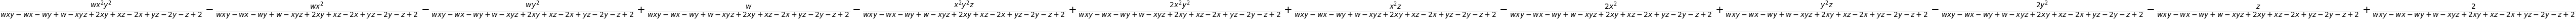

In [9]:
expr.expand()

In [10]:
expr.factor()

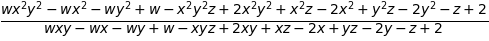

In [11]:
expr.trigsimp()

In [12]:
expr.cancel()

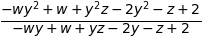

In [13]:
expr.subs(x, 0)

In [14]:
expr.subs({x: 0., y:2., z:1, w:5.})

##### Calculus in Sympy

In [15]:
#partial differentiation
x, y, i = sy.symbols('x, y, i')
expr = sy.product((x+i*y), (i, 1, 23))
expr = expr.expand()
expr.diff(x, 20)

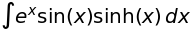

In [16]:
#integration
expr = sy.Integral(sy.sin(x)*sy.exp(x)*sy.sinh(x), x)
expr

In [17]:
expr.doit()

In [18]:
#differentiation
x, y = sy.symbols('x,y')
expr = sy.sin(x)*sy.cos(x)*sy.exp(y)*(x**3+y)**4
expr

In [19]:
#derivative is calculated using 
expr.diff(x)

In [20]:
#or this
sy.Derivative(expr, x).doit()

In [21]:
#3rd derivative
expr.diff(x, 3)

In [22]:
#integrate two variables along 2 different bounds
sy.integrate(y**2*x**2, (x, -1, 1), (y, -1, 1))

### Problem 3.
Use SymPy to symbolically evaluate 
$$\int^{\infty}_{0} sin(x^2)dx$$
In SymPy, positive infinity is represented by the object `sy.oo`

In [23]:
x = sy.symbols("x")
sy.integrate(sy.sin(x**2), (x,0, sy.oo))

### Problem 4. 
Use SymPy to calculate the derivate of $e^{sin(cos(x))}$ at `x = 1`. Time how long it takes to compute this derivative using SymPy as well as centered difference quotients and calculate the error for each approximation.

In [24]:
#using sympy
x = sy.symbols("x")
expr = sy.exp(sy.sin(sy.cos(x)))
expr

In [25]:
%%time
der_sympy = expr.diff().subs(x,1).evalf()
print(der_sympy)

-1.20697770397991
CPU times: user 8.07 ms, sys: 1.12 ms, total: 9.2 ms
Wall time: 9.11 ms


In [26]:
#using centered difference quotients
def deriv(f, pts, h=1e-5):
    return 0.5*(f(pts+h)-f(pts-h))/h

f = lambda x: np.exp(np.sin(np.cos(x)))

In [27]:
%%time
der_center = deriv(f, 1)
print(der_sympy)

-1.20697770397991
CPU times: user 1 ms, sys: 834 µs, total: 1.84 ms
Wall time: 1.17 ms


In [28]:
#abs error
np.abs(der_sympy - der_center)

### Problem 5. 
Use SymPy to solve the following differential equation:

$$y_{xxxxxx} + 3y_{xxxx} + 3y_{xx} + y = x^{10}e^{x} + x^{11} sin(x) + x^{12} e^{x} sin(x) - x^{13}cos(2x) + x^{14}e^{x} cos (3x)$$
You may recall from your last class on differential equations that this sort of problem is solved by the method of undetermined coefficients. Imagine how terrible this would be to do by hand!

In [29]:
x = sy.symbols("x")
y = sy.Function('y')
eq = sy.Eq(y(x).diff(x, 6) + 3*y(x).diff(x, 4) + 3*y(x).diff(x, 2) + y(x),
           x**10*sy.exp(x) + x**11*sy.sin(x) + x**12*sy.exp(x)*sy.sin(x) - x**13*sy.cos(2*x)
           + x**14*sy.exp(x)*sy.cos(3*x))

In [30]:
sy.dsolve(eq)

In [31]:
#jacobian matrix
x,y = sy.symbols("x,y")
F = sy.Matrix([x**2, x+y])
F.jacobian([x,y])

⎡2⋅x  0⎤
⎢      ⎥
⎣ 1   1⎦

## Autograd

In [32]:
from autograd import grad, multigrad, jacobian
import autograd.numpy as np

In [33]:
g = lambda x: np.exp(np.sin(np.cos(x)))
grad_g = grad(g)
grad_g(1.)

In [34]:
#wrt multiple variables
f = lambda x,y: 3*x*y + 2*y -x
grad_f = grad(f, argnum=0)
grad_f(.25, .5)

array(0.5)

In [35]:
grad_f = grad(f, argnum=1)
grad_f(.25, .5)

array(2.75)

In [36]:
#or this
grad_fun = multigrad(f, argnums=[0,1])
grad_fun(.25, .5)

(array(0.5), array(2.75))

### Problem 6. 
Use autograd to compute the derivative of $f(x) = ln\sqrt{sin(\sqrt{x})}$ at x = $\frac{\pi}{4}$ . Time how long it takes to compute this derivative using autograd,SymPy, and the centered difference quotient. Calculate the error for each approximation.

In [39]:
%%time
# using centered difference quotients
f = lambda x: np.log(np.sqrt(np.sin(np.sqrt(x))))
der_center = deriv(f, np.pi/4)
print(der_center)

0.230259011161
CPU times: user 412 µs, sys: 215 µs, total: 627 µs
Wall time: 493 µs


In [40]:
%%time
#using sympy
x = sy.symbols("x")
expr = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
der_sympy = expr.diff(x).subs(x, sy.pi/4).evalf()
print(der_sympy)

0.230259011146961
CPU times: user 11.3 ms, sys: 574 µs, total: 11.9 ms
Wall time: 11.5 ms


In [41]:
%%time
# using autograd
grad_f = grad(f)
der_grad = grad_f(np.pi/4)
print(der_grad)

0.230259011147
CPU times: user 670 µs, sys: 287 µs, total: 957 µs
Wall time: 739 µs


In [42]:
print("sympy and centered diff: ", np.abs(der_sympy-der_center))
print("sympy and autograd:", np.abs(der_sympy-der_grad))
print("centered diff and autograd:", np.abs(der_center-der_grad))

sympy and centered diff:  1.38440647834415e-11
sympy and autograd: 0
centered diff and autograd: 1.38440647834e-11


### Problem 7.

Let $f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ be defined by

$$f(x,y) = \begin{bmatrix}
            e^xsin(y)+y^3 \\
            3y-cos(x)
           \end{bmatrix}$$

Find the Jacobian function using SymPy and autograd. Time how long it takes to compute each Jacobian at `(x, y) = (1, 1)`.

In [43]:
%%time
#using autograd
f = lambda x: np.array([np.exp(x[0])*np.sin(x[1]) + x[1]**3, 3*x[1] - np.cos(x[0])])
jacobian_f = jacobian(f)
print(jacobian_f(np.ones(2)))

[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
CPU times: user 2.28 ms, sys: 551 µs, total: 2.83 ms
Wall time: 2.36 ms


In [44]:
%%time
#using sympy
x,y = sy.symbols("x,y")
F = sy.Matrix([sy.exp(x)*sy.sin(y) +y**3, 3*y - sy.cos(x)])
print(F.jacobian([x,y]).subs({x:1, y:1}).evalf())

Matrix([[2.28735528717884, 4.46869393991589], [0.841470984807897, 3.00000000000000]])
CPU times: user 9.18 ms, sys: 609 µs, total: 9.79 ms
Wall time: 9.26 ms
